In [ ]:
# from bayespy.nodes import Bernoulli, Beta, DirichletConcentration, Dirichlet
from bayespy.nodes import Mixture
from numpy import array
from bayespy.inference import VB


C = DirichletConcentration(2)
C.initialize_from_value([0.1, 0.1])
#P = Beta([0.5,0.5], plates=(3,), name='P')
#P = Beta(C, plates=(3,), name='P')
P = Dirichlet([1,1,1], name='P')
data = array([[0,True],[0,True],[0,True],[0,False],[1,True],[1,True]])
print(data[:,0], data[:,1])
Z = Mixture(data[:,0], Bernoulli, P)
Z.observe(data[:,1])
# Creating inference engine
#Q = VB(Z,P,C)
Q = VB(Z,P)
Q.update(repeat=1000)
print(P.get_parameters())

In [35]:
P.get_moments()

[array([[-0.18395744, -1.79751879],
        [-0.18021895, -1.81663558],
        [-0.18209196, -1.8072045 ]])]

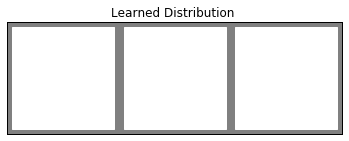

In [30]:
%matplotlib inline
import bayespy.plot as bpplt
bpplt.hinton(P)
bpplt.pyplot.title("Learned Distribution ")
bpplt.pyplot.show()

In [28]:
from bayespy.nodes import Bernoulli, Beta, DirichletConcentration
from bayespy.nodes import Mixture
from numpy import array
from bayespy.inference import VB

P = Beta([0.5,0.5], plates=(1,), name='P')

data = array([[0,True],[0,True],[0,True],[0,False],[1,True],[1,True]])
print(data[:,0], data[:,1])

z1data = array([True, True, True, True, True, True, True, True, True, False])
Z1 = Bernoulli(P,plates=(10,), name='Z1')
Z1.observe(z1data)

z2data = array([True, False])
Z2 = Bernoulli(1-P,plates=(2,), name='Z2')
Z2.observe(z2data)

z3data = array([False])
Z3 = Bernoulli(1-P,plates=(1,), name='Z3')
Z3.observe(z3data)

# Creating inference engine
Q = VB(Z1, Z2, Z3,P)
Q.update(repeat=1000)
%matplotlib inline
import bayespy.plot as bpplt
bpplt.hinton(P)
bpplt.pyplot.title("Learned Distribution ")
bpplt.pyplot.show()

from bayespy.nodes import Bernoulli, Beta
>>> p = Beta([1e-3, 1e-3])
>>> z = Bernoulli(p, plates=(10,))
>>> z.observe([0, 1, 1, 1, 0, 1, 1, 1, 0, 1])
>>> p.update()
>>> import bayespy.plot as bpplt
>>> import numpy as np
>>> bpplt.pdf(p, np.linspace(0, 1, num=100))

[0 0 0 0 1 1] [1 1 1 0 1 1]


TypeError: unsupported operand type(s) for -: 'int' and 'Beta'

Iteration 1: loglike=-6.040255e+00 (0.010 seconds)
Iteration 2: loglike=-5.947403e+00 (0.010 seconds)
Iteration 3: loglike=-5.905029e+00 (0.000 seconds)
Iteration 4: loglike=-5.885717e+00 (0.000 seconds)
Iteration 5: loglike=-5.877010e+00 (0.000 seconds)
Iteration 6: loglike=-5.873131e+00 (0.000 seconds)
Iteration 7: loglike=-5.871422e+00 (0.010 seconds)
Iteration 8: loglike=-5.870674e+00 (0.000 seconds)
Iteration 9: loglike=-5.870350e+00 (0.000 seconds)
Iteration 10: loglike=-5.870209e+00 (0.000 seconds)
 ~ Dirichlet(alpha)
  alpha =
[ 1.          4.94483965  2.05516035]
 ~ Categorical(p)
  p = 
[[ 0.          0.73620991  0.26379009]
 [ 0.          0.73620991  0.26379009]
 [ 0.          0.73620991  0.26379009]
 [ 0.          0.73620991  0.26379009]
 [ 0.          1.          0.        ]]



/home/deebuls/anaconda3/lib/python3.5/site-packages/bayespy/inference/vmp/nodes/dirichlet.py:91: RuntimeWarning: divide by zero encountered in log
  logp = np.log(p)


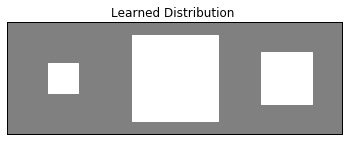

In [6]:

import bayespy as bp
p = bp.nodes.Dirichlet([1, 1, 1])
locations = bp.nodes.Categorical(p, plates=(5,))
observations = bp.nodes.Mixture(
    locations,
    bp.nodes.Bernoulli,
    [
        [0.0, 0.5, 0.5],
        [0.0, 0.5, 0.5],
        [0.0, 0.5, 0.5],
        [0.0, 0.5, 0.5],
        [0.0, 0.5, 0.0],
    ]
)
observations.observe([True, True, True, True, True])
Q = bp.inference.VB(observations, locations, p)
Q.update(repeat=10)
print(p)
print(locations)

%matplotlib inline
import bayespy.plot as bpplt
bpplt.hinton(p)
bpplt.pyplot.title("Learned Distribution ")
bpplt.pyplot.show()